<a href="https://colab.research.google.com/github/iynnn/Semester-6/blob/main/AI/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Muhamad Feriyanto/222011347/3SD1

# Autoencoder
https://www.geeksforgeeks.org/implementing-an-autoencoder-in-pytorch/ 

Autoencoders are a type of neural network which generates an “n-layer” coding of the given input and attempts to reconstruct the input using the code generated. This Neural Network architecture is divided into the encoder structure, the decoder structure, and the latent space, also known as the “bottleneck”. To learn the data representations of the input, the network is trained using Unsupervised data. These compressed, data representations go through a decoding process wherein which the input is reconstructed. An autoencoder is a regression task that models an identity function.



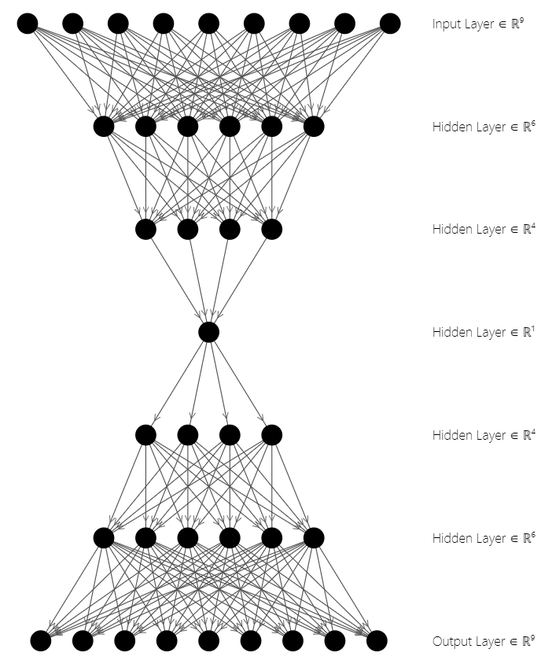

In [19]:
!pip install torch -q
!pip install torchvision -q

# Implementation of Autoencoder in Pytorch

## Step 1 : Importing Modules

In [20]:
import torch 
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt

## Step 2 : Loading the Dataset

In [21]:
import torch
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code

if is_cuda:
  device = torch.device("cuda")
  print("GPU is available")
else:
  device = torch.device("cpu")
  print("GPU not available, CPU used")

GPU is available


This snippet loads the MNIST dataset into loader using DataLoader module. The dataset is downloaded and **transformed into image tensors** . Using the DataLoader module, the tensors are loaded and ready to be used. The dataset is loaded with Shuffling enabled and a *batch size of 64*.

In [22]:
# Transforms images to a PyTorch Tensor
tensor_transform = transforms.ToTensor()

# Download the MNIST Dataset
dataset = datasets.MNIST(root = "./data",
						train = True,
						download = True,
						transform = tensor_transform)

# DataLoader is used to load the dataset
# for training
loader = torch.utils.data.DataLoader(dataset = dataset,
									batch_size = 32,
									shuffle = True)


## Step 3: Create Autoencoder Class

Reduce Dimensionality Encoder :   
28 * 28 = 784 --> 128 --> 64 --> 36 --> 18 --> 9  
9 itu latent spacenya

Waktu encoder menggunakan Lienar layer diikuti dengan layer ReLU

Increase Dimensionality Decoder :     
9 --> 18 --> 36 --> 64 --> 128 --> 784  

Decoder arsitektur menggunakan sigmoid layer (di bagian akhir)

In [23]:
# Creating a PyTorch class
# 28*28 ==> 9 ==> 28*28
class AE(torch.nn.Module):
	def __init__(self):
		super().__init__()
		
		# Building an linear encoder with Linear
		# layer followed by Relu activation function
		# 784 ==> 9
		self.encoder = torch.nn.Sequential(
			torch.nn.Linear(28 * 28, 128),
			torch.nn.ReLU(),
			torch.nn.Linear(128, 64),
			torch.nn.ReLU(),
			torch.nn.Linear(64, 36),
			torch.nn.ReLU(),
			torch.nn.Linear(36, 18),
			torch.nn.ReLU(),
			torch.nn.Linear(18, 9)
		)
		
		# Building an linear decoder with Linear
		# layer followed by Relu activation function
		# The Sigmoid activation function
		# outputs the value between 0 and 1
		# 9 ==> 784
		self.decoder = torch.nn.Sequential(
			torch.nn.Linear(9, 18),
			torch.nn.ReLU(),
			torch.nn.Linear(18, 36),
			torch.nn.ReLU(),
			torch.nn.Linear(36, 64),
			torch.nn.ReLU(),
			torch.nn.Linear(64, 128),
			torch.nn.ReLU(),
			torch.nn.Linear(128, 28 * 28),
			torch.nn.Sigmoid()
		)

	def forward(self, x):
		encoded = self.encoder(x)
		decoded = self.decoder(encoded)
		return decoded


## Step 4 : Initializing Model 

In [24]:
# Model Initialization
model = AE()

model.to(device)

# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()

# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(),
							lr = 1e-1,
							weight_decay = 1e-8)


## Step 5 Creare Output Generation

In [25]:
for layer in model.children():
   if hasattr(layer, 'reset_parameters'):
       layer.reset_parameters()

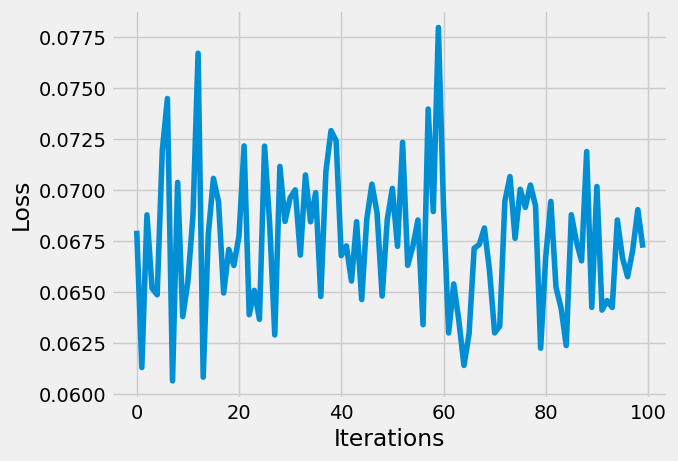

In [26]:
epochs = 20
outputs = []
losses = []
for epoch in range(epochs):
	for (image, _) in loader:
	
	# Reshaping the image to (-1, 784)
	  image = image.reshape(-1, 28*28).to(device)
	
	# Output of Autoencoder
	  reconstructed = model(image)
	
	# Calculating the loss function
	  loss = loss_function(reconstructed, image)
	
	# The gradients are set to zero,
	# the gradient is computed and stored.
	# .step() performs parameter update
	  optimizer.zero_grad()
	  loss.backward()
	  optimizer.step()
	
	# Storing the losses in a list for plotting
	  losses.append(loss.detach().cpu().numpy())
	outputs.append((epochs, image, reconstructed))

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Plotting the last 100 values
plt.plot(losses[-100:])


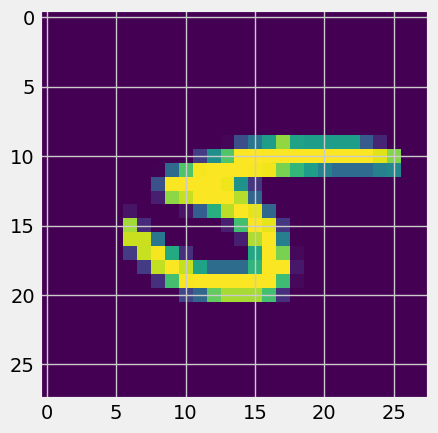

In [29]:
for i, item in enumerate(image):

  # Reshape the array for plotting
  item = item.reshape(-1, 28, 28)
  plt.imshow(item[0].detach().cpu().numpy())


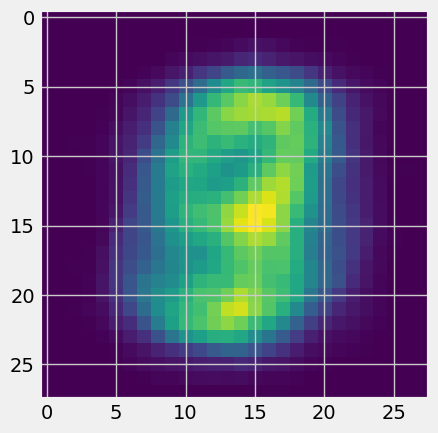

In [28]:

for i, item in enumerate(reconstructed):
  item = item.reshape(-1, 28, 28)
  plt.imshow(item[0].detach().cpu().numpy())
